# **Physics Related Code**


## **Angled Throw**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def input_variables():
    velocity = float(input("Velocity: "))
    theta = float(input("Theta: "))
    return velocity, theta


def velocity_components(velocity, theta):
    v_x = velocity * np.cos(2*np.pi*theta/360)
    v_y = velocity * np.sin(2*np.pi*theta/360)
    return v_x, v_y


def time(v_y):
    t_max = 2 * v_y / 9.8
    time_points = np.arange(0, t_max, 0.001)
    return t_max, time_points


def coordinate_components(time_points, v_x, v_y):
    x_coord = v_x * time_points
    y_coord = v_y * time_points - 0.5 * 9.8 * time_points ** 2
    return x_coord, y_coord


def plot_trajectory(x_coord, y_coord):
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(x_coord, y_coord)


plt.figure(figsize=(10, 10))
velocity, theta = input_variables()
v_x, v_y = velocity_components(velocity, theta)
t_max, time_points = time(v_y)
x_coord, y_coord = coordinate_components(time_points, v_x, v_y)
plot_trajectory(x_coord, y_coord)
plt.show()


## **Exponential Decay**

### Synthetic Data Creation

In [ ]:
import numpy as np
import random



def exponential_decay(t, N_0, tau):
  N = N_0 * np.exp(-t/tau)
  return N


def noise_generator(error):
  noise = random.random()
  while noise > error:
    noise = random.random()
  return noise


def time_array():
  time_points = np.arange(0, 1000, 0.5)
  return time_points


def synthetic_data_points(func, noise_generator_func, error, time_points, N_0, tau):
  data_points = []
  for t in time_points:
    data_points.append(exponential_decay_func(t, N_0, tau) + noise_generator_func(error) * exponential_decay_func(t, N_0, tau))
  return np.array(data_points)


### Plotting the Data, Fit Curve and the idealized Decay Function

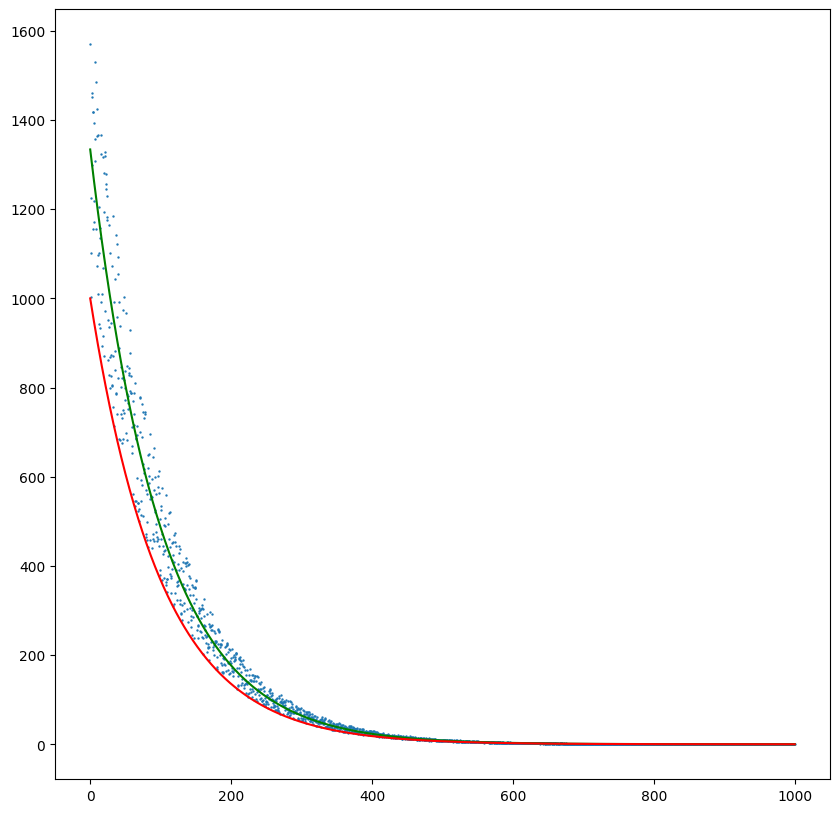

In [ ]:
import matplotlib.pyplot as plt
import scipy.optimize as opt


def fit_curve(data_points, time_points):
  popt, pcov = opt.curve_fit(exponential_decay, time_points, data_points)
  return popt


N_0 = 1000
tau = 100
time_points = time_array()
data_points = synthetic_data_points(exponential_decay, noise_generator, 0.65, time_points, N_0, tau)
popt = fit_curve(data_points, time_points)
plt.figure(figsize=(10, 10))
plt.scatter(time_points, data_points, s=0.5)
plt.plot(time_points, exponential_decay(time_points, *popt), color="green")
plt.plot(time_points, exponential_decay(time_points, N_0, tau), color="red")
plt.show()

## **Linear Regression**


### Data Creation


In [ ]:
import numpy as np
import random


def linear_function(m, c, x):
  y = m * x + c
  return y


def noise_generator(error):
  noise = random.random()
  while noise > error:
    noise = random.random()
  return noise


def x_array():
  x_points = np.arange(0, 10, 0.1)
  return x_points


def synthetic_data_points(linear_func, noise_generator_func, error, x_points, m, c):
  data_points = []
  for x in x_points:
    data_points.append(linear_func(m, c, x) + noise_generator_func(error) * linear_func(m, c, x))
  return np.array(data_points)



### Linear Regression and Plot

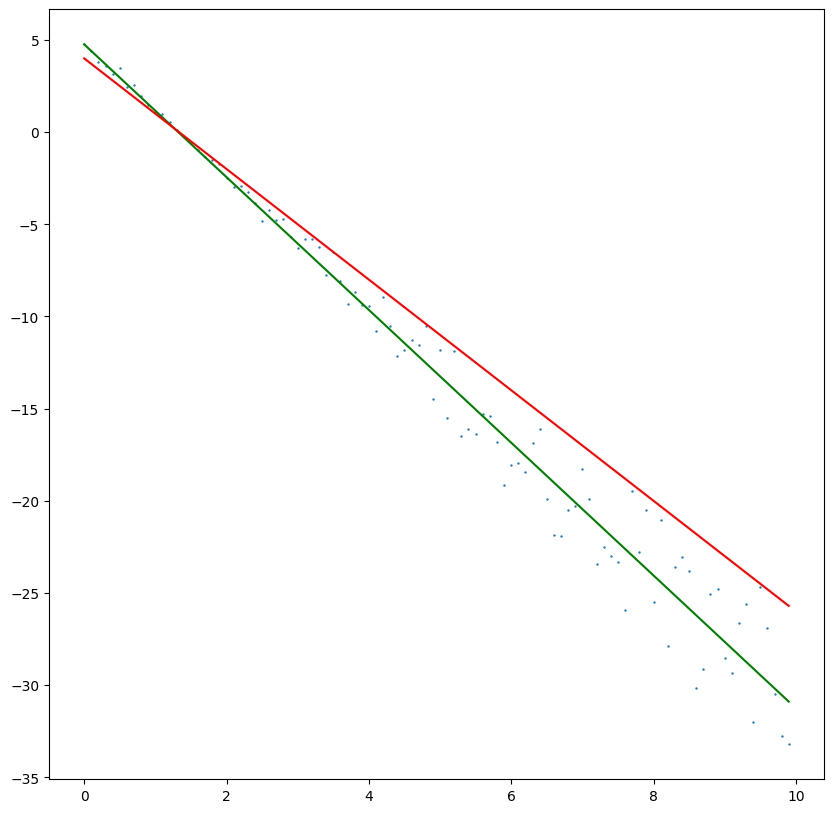

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def fit_line_parameters(data_points, x_points):
  m, c = np.polyfit(x_points, data_points, 1)
  return m, c


def fit_line(m, c, x_points):
  y = m * x_points + c
  return y


m = -3
c = 4
x_points = x_array()
data_points = synthetic_data_points(linear_function, noise_generator, 0.4, x_points, m, c)
popt = fit_line_parameters(data_points, x_points)
plt.figure(figsize=(10, 10))
plt.scatter(x_points, data_points, s=0.5)
plt.plot(x_points, fit_line(*popt, x_points), color="green")
plt.plot(x_points, linear_function(m, c, x_points), color="red")
plt.show()




## **Numerical Integration**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from functions import polynomial_function_number


def num_int_trapezoidal(func, N, a, b, coefficients, exponents):
    integral = 0
    h = (b - a)/N
    for i in range(N):
      x = a + i*h
      integral += ((func(coefficients, exponents, x)+func(coefficients, exponents, x+h))/2)*h
    return integral


coefficients = [-1, 0, -3]
exponents = [0, 1, 2]
N = 1000
a = 0
b = 5
print(num_int_trapezoidal(polynomial_function_number, N, a, b, coefficients, exponents))



-130.0000625


## **ODE Solving Euler's Method**

### First Order ODE

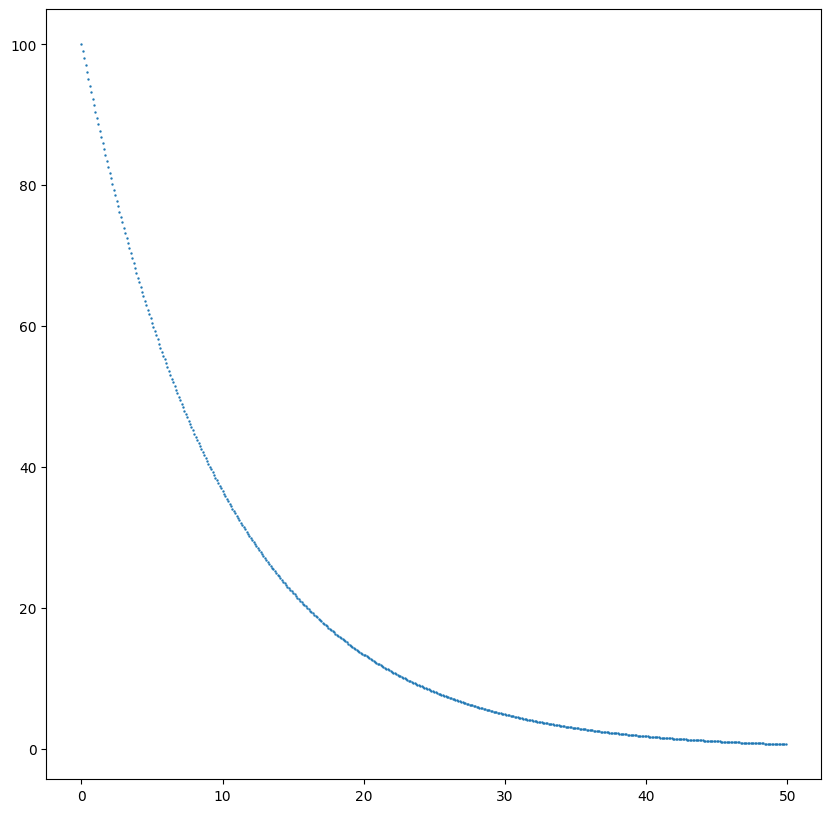

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f_diff(t, y, k):
  f_diff = -k*y
  return f_diff


def euler_ODE_appr(y_0, t_begin, t_end, N, f_diff, k, t):
  h = (t_end - t_begin)/N
  t_points = np.arange(t_begin, t_end, h)
  y_points = []
  y_points.append(y_0)
  for i in range(N-1):
    y_points.append(y_points[i] + h*f_diff(t, y_points[i], k))
  return t_points, y_points


popt = euler_ODE_appr(100, 0, 50, 500, f_diff, 0.1, 0)
plt.figure(figsize=(10, 10))
plt.scatter(popt[0], popt[1], s=0.5)
plt.show()

### Higher Order ODE

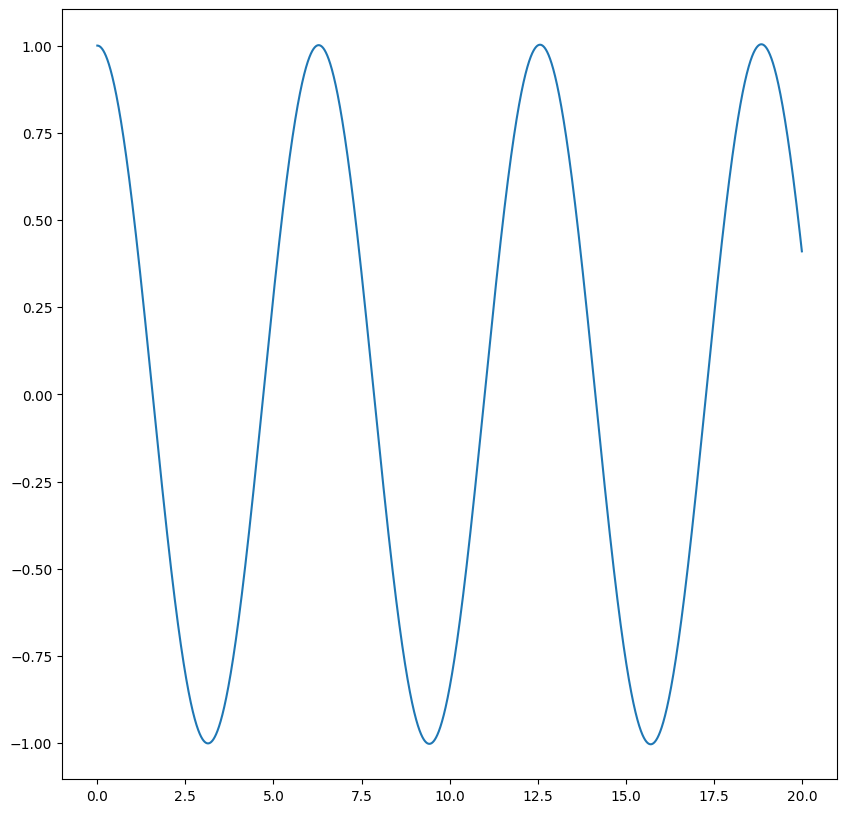

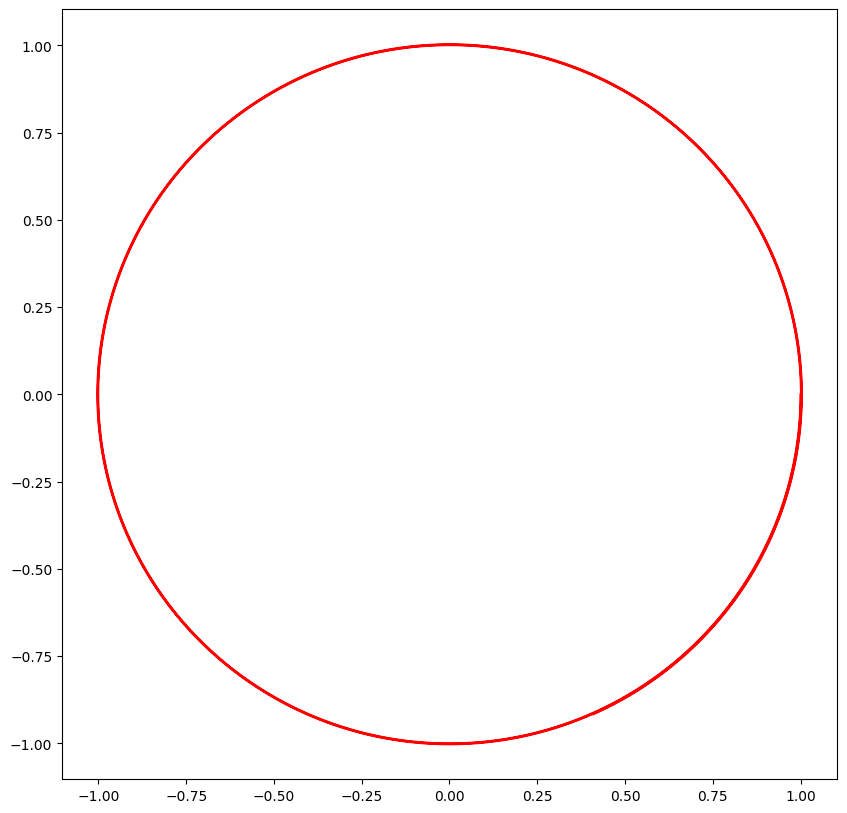

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def system_f_diff(y_vector, factors):
  dydt = np.copy(y_vector)
  dydt[0] = y_vector[1]
  dydt[1] = -factors[1]/factors[2]*y_vector[0]
  return dydt


def euler_ODE_appr(y_0, t_begin, t_end, N, f_diff_func, factors):
  h = (t_end - t_begin)/N
  t_points = np.linspace(t_begin, t_end, N)
  y_points = np.zeros((N, len(y_0)))
  y_points[0] = y_0
  for i in range(N - 1):
    y_points[i+1] = y_points[i] + h * f_diff_func(y_points[i], factors)
  return t_points, y_points


factors = [0, 1, 1]
popt = euler_ODE_appr(np.array([1.0, 0.0]), 0, 20, 5000, system_f_diff, factors)
plt.figure(figsize=(10, 10))
plt.plot(popt[0], popt[1][:, 0])
plt.figure(figsize=(10, 10))
plt.plot(popt[1][:, 0], popt[1][:, 1], color="red")
plt.show()

## **2D Random Walk Simulation**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def random_walk(p_0, N):
  step_array = np.arange(0, N+1, 1)
  position_array = np.zeros((N+1, 2))
  position_array[[0], :] = p_0
  for step in range(1, N+1):
    n = random.choice([-1, 1])
    if n < 0:
      position_array[step] = position_array[step-1] + np.array([random.choice([-1, 1]), 0])
    else:
      position_array[step] = position_array[step-1] + np.array([0, random.choice([-1, 1])])
  return step_array, position_array

In [ ]:
import numpy as np
import scipy.optimize

U_kl = [5.3, 4.9, 4.5, 3.5, 2.5]
I = [0, 0.12, 0.3, 0.6, 0.8]


def line(U_kl, I, R_inn, U_0):
  U_kl = U_0 - I*R_inn
  return U_0, R_inn


popt = np.polyfit(I, U_kl, 1)
print(popt)

[-3.38703838  5.37288197]


## **OOP with Particles**

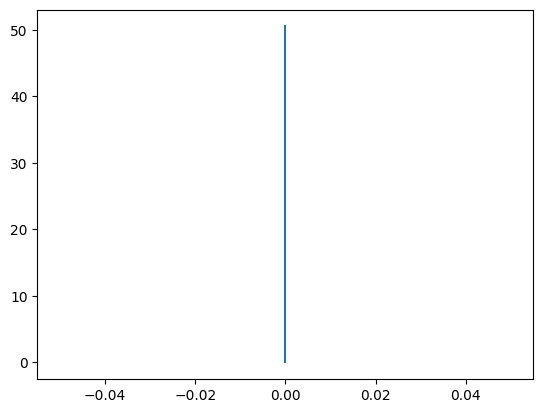

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


class particle:
  def __init__(self, x, y, v_x, v_y, m, color="blue"):
    self.x = x
    self.y = y
    self.v_x = v_x
    self.v_y = v_y
    self.m = m
    self.color = color

  def move(self, t, dt):
    initial_x = self.x
    initial_y = self.y
    self.x = []
    self.y = []
    self.x.append(initial_x)
    self.y.append(initial_y)
    T = 0
    while T < t:
      self.x.append(self.x[-1] + self.v_x*dt)
      self.y.append(self.y[-1] + self.v_y*dt)
      T += dt
    return self.x, self.y


  def move_single(self, dt):
      self.x += self.v_x*dt
      self.y += self.v_y*dt


  def show(self):
    plt.plot(self.x, self.y)







## **Pendelum Simulations**

### Dampened Pendelum

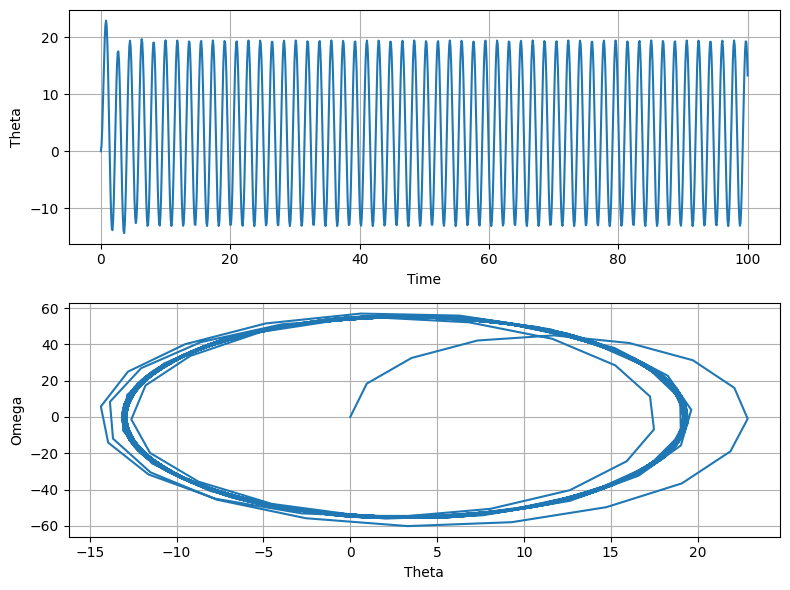

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


def pendulum_diffeq(state_vector, t, g, L, c, m, A, omega2):
  theta, omega = state_vector
  dtheta_dt = omega
  domega_dt = -g / L * np.sin(theta) - c/m * omega + A/m * np.cos(omega2*t)
  return [dtheta_dt, domega_dt]


def solution_pendulum(time_points, initial_state, diff_func, g, L, c, m, A, omega2):
  solution = scipy.integrate.odeint(diff_func, initial_state, time_points, args=(g, L, c, m, A, omega2))
  return solution


time_points = np.linspace(0, 100, 1000)
initial_state = [0, 0]
g = 9.8
L = 1
c = 1
m = 1
A = 200
omega2 = np.sqrt(9.8) + 0.3
popt = solution(time_points, initial_state, pendulum_diffeq, g, L, c, m, A, omega2)
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].plot(time_points, popt[:, 0])
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Theta')
axs[0].grid(True)
axs[1].plot(popt[:, 0], popt[:, 1])
axs[1].set_xlabel('Theta')
axs[1].set_ylabel('Omega')
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Resonance Curve

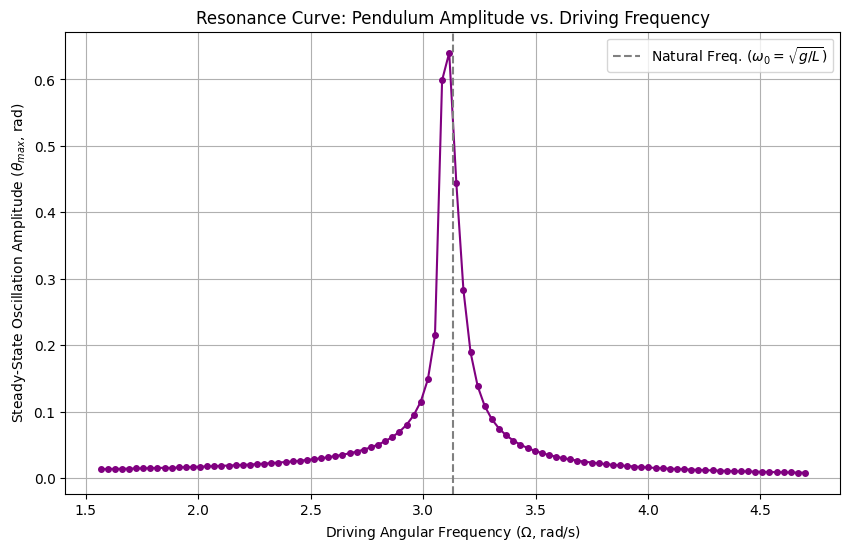

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate


def pendulum_diffeq(state_vector, t, g, L, c, m, A, omega_drive):
  theta, omega = state_vector
  dtheta_dt = omega
  domega_dt = -g / L * np.sin(theta) - c/m * omega + A/m * np.cos(omega_drive * t)
  return [dtheta_dt, domega_dt]


def solve_pendulum(time_points, initial_state, diff_func, g, L, c, m, A, omega_drive):
  sol = scipy.integrate.odeint(diff_func, initial_state, time_points, args=(g, L, c, m, A, omega_drive))
  return sol


g = 9.81
L = 1.0
m = 1.0
c = 0.001
A = 0.05

omega_natural = np.sqrt(g / L)
omega_drives = np.linspace(0.5 * omega_natural, 1.5 * omega_natural, 100)
time_points_single_run = np.linspace(0, 100, 5000)
initial_state = [0.0, 0]

steady_state_amplitudes = []

for i, current_omega_drive in enumerate(omega_drives):
    popt_current_run = solve_pendulum(
        time_points_single_run, initial_state, pendulum_diffeq,
        g, L, c, m, A, current_omega_drive
    )
    steady_state_theta = popt_current_run[:, 0]
    amplitude = np.max(np.abs(steady_state_theta))
    steady_state_amplitudes.append(amplitude)

plt.figure(figsize=(10, 6))
plt.plot(omega_drives, steady_state_amplitudes, '-o', markersize=4, color='purple')
plt.axvline(x=omega_natural, color='gray', linestyle='--', label=r'Natural Freq. ($\omega_0 = \sqrt{g/L}$)')
plt.xlabel(r'Driving Angular Frequency ($\Omega$, rad/s)')
plt.ylabel(r'Steady-State Oscillation Amplitude ($\theta_{max}$, rad)')
plt.title('Resonance Curve: Pendulum Amplitude vs. Driving Frequency')
plt.grid(True)
plt.legend()
plt.show()

### Coupled Pendelum

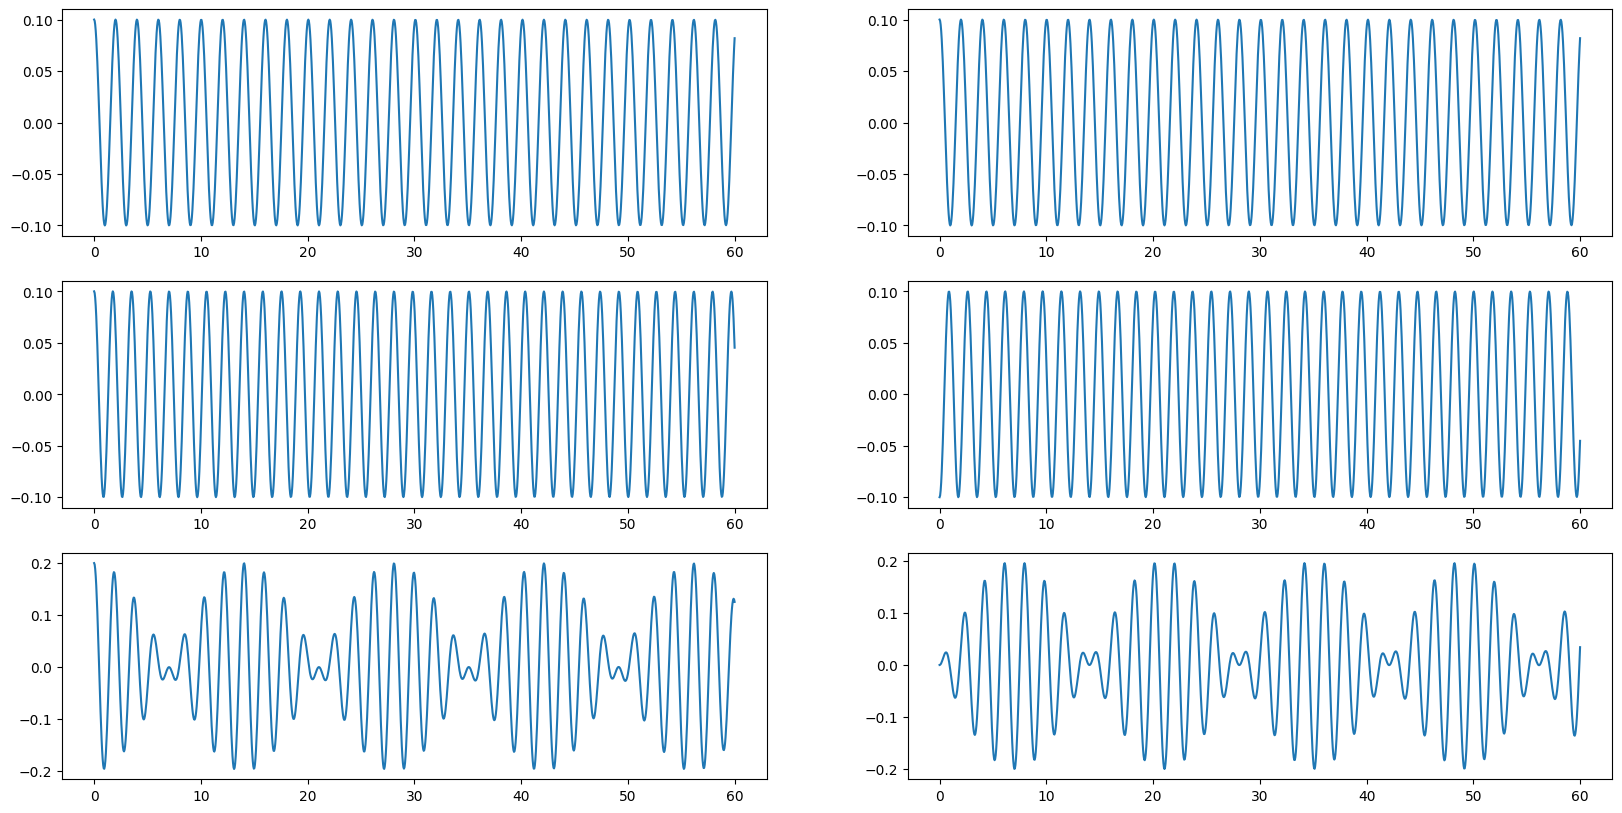

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate


def coupled_pendulum_diffeq(t, state_vector, g, L, m1, m2, k ):
  dydt = np.zeros_like(state_vector)
  dydt[0] = state_vector[1]
  dydt[1] = -g/L * state_vector[0] - k/m1 * (state_vector[0] - state_vector[2])
  dydt[2] = state_vector[3]
  dydt[3] = -g/L * state_vector[2] - k/m2 * (state_vector[2] - state_vector[0])
  return dydt


def solution_coupled_pendulum(time_points, initial_state, diff_func, g, L, m1, m2, k):
  sol = scipy.integrate.solve_ivp(diff_func, [0, time_points[-1]], initial_state, args=(g, L, m1, m2, k), t_eval=time_points)
  return sol


initial_state1 = [0.1, 0, 0.1, 0]
initial_state2 = [0.1, 0, -0.1, 0]
initial_state3 = [0.2, 0, 0, 0]
time_points = np.linspace(0, 60, 1200)
g = 9.8
L = 1
m1 = m2 = 2
k = 3


popt1 = solution_coupled_pendulum(time_points, initial_state1, coupled_pendulum_diffeq, g, L, m1, m2, k)
popt2 = solution_coupled_pendulum(time_points, initial_state2, coupled_pendulum_diffeq, g, L, m1, m2, k)
popt3 = solution_coupled_pendulum(time_points, initial_state3, coupled_pendulum_diffeq, g, L, m1, m2, k)
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes[0, 0].plot(time_points, popt1.y[0], label='Initial State 1.1')
axes[0, 1].plot(time_points, popt1.y[2], label='Initial State 1.2')
axes[1, 0].plot(time_points, popt2.y[0], label='Initial State 2.1')
axes[1, 1].plot(time_points, popt2.y[2], label='Initial State 2.2')
axes[2, 0].plot(time_points, popt3.y[0], label='Initial State 3.1')
axes[2, 1].plot(time_points, popt3.y[2], label='Initial State 3.2')
plt.show()


## **Particles moving in Gravitational Field**

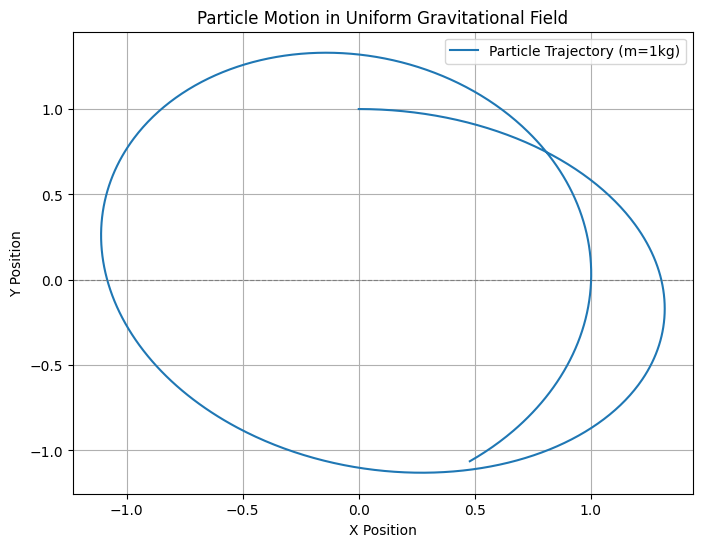

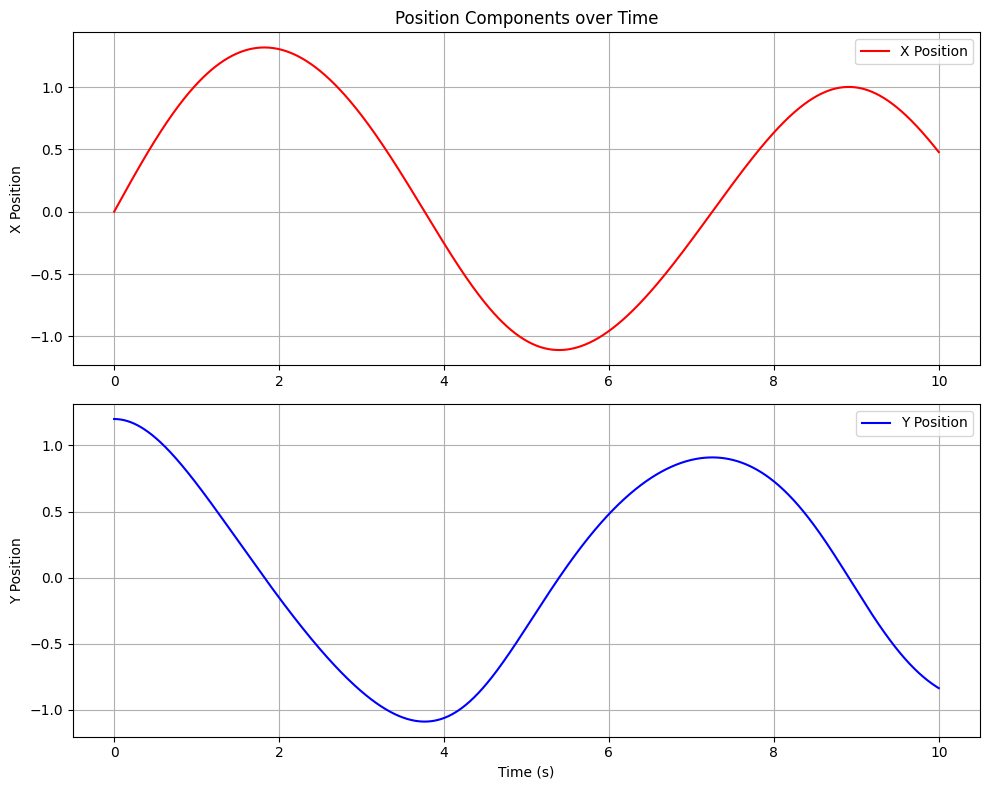

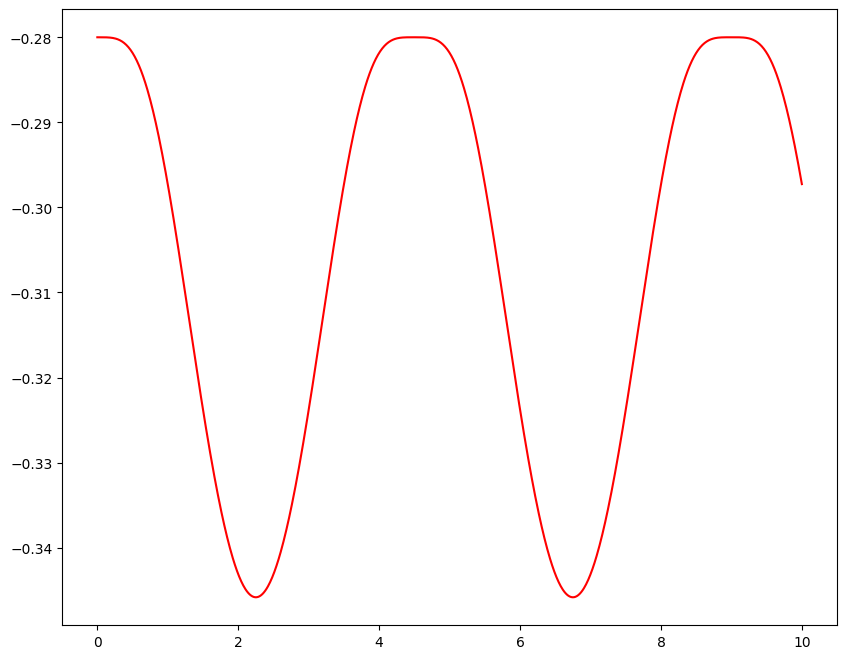

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


def particle_dynamics_gravitational(t, state_vector, m, q, Gamma):
  dydt = np.zeros_like(state_vector)
  dydt[0] = state_vector[2]
  dydt[1] = state_vector[3]
  dydt[2] = -Gamma * state_vector[0]/m * (np.sqrt(state_vector[0]**2 + state_vector[1]**2)**(-3/2))
  dydt[3] = -Gamma * state_vector[1]/m * (np.sqrt(state_vector[0]**2 + state_vector[1]**2)**(-3/2))
  return dydt


class particle:
  def __init__(self, initial_state, m, q, Gamma):
    self.initial_state = initial_state
    self.m = m
    self.q = q
    self.Gamma = Gamma
    self.time = None
    self.trajectory = None

  def solution_particle(self, time_range, time_range_array, rtol=1e-9, atol=1e-12):
    self.time = time_range_array
    self.trajectory = scipy.integrate.solve_ivp(particle_dynamics_gravitational, time_range, self.initial_state, args=(self.m, self.q, self.Gamma), t_eval=time_range_array, method='DOP853', rtol=rtol, atol=atol)


  def plot_trajectory(self):
    plt.figure(figsize=(8, 6))
    plt.plot(self.trajectory.y[0, :], self.trajectory.y[1, :], label=f'Particle Trajectory (m={self.m}kg)')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Particle Motion in Uniform Gravitational Field')
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend()
    plt.show()


  def plot_position_components(self):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    axs[0].plot(self.time, self.trajectory.y[0, :], color='red', label='X Position')
    axs[0].set_ylabel('X Position')
    axs[0].set_title('Position Components over Time')
    axs[0].grid(True)
    axs[0].legend()

    axs[1].plot(self.time, self.trajectory.y[2, :], color='blue', label='Y Position')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Y Position')
    axs[1].grid(True)
    axs[1].legend()
    plt.tight_layout()
    plt.show()


  def plot_energy(self):
    fig, ax = plt.subplots(figsize=(10, 8))
    energy_kinetic = 0.5 * self.m * (self.trajectory.y[2, :]**2 + self.trajectory.y[3, :]**2)
    energy_potential = -self.Gamma/np.sqrt(self.trajectory.y[0, :]**2 + self.trajectory.y[1, :]**2)
    energy = energy_kinetic + energy_potential
    ax.plot(self.time, energy, color='red')
    plt.show()


x = 100
time_vector = [0, x]
time_vector_array = np.linspace(0, x, 100*x)
mass1 = particle([0, 1, 0.9, 0], 1, 1, 1)
mass1.solution_particle(time_vector, time_vector_array)
import numpy as np
import matplotlib.pyplot as plt
import scipy


def particle_dynamics_gravitational(t, state_vector, m, q, Gamma):
  dydt = np.zeros_like(state_vector)
  dydt[0] = state_vector[2]
  dydt[1] = state_vector[3]
  dydt[2] = -Gamma * state_vector[0]/m * (np.sqrt(state_vector[0]**2 + state_vector[1]**2)**(-3/2))
  dydt[3] = -Gamma * state_vector[1]/m * (np.sqrt(state_vector[0]**2 + state_vector[1]**2)**(-3/2))
  return dydt


class particle:
  def __init__(self, initial_state, m, q, Gamma):
    self.initial_state = initial_state
    self.m = m
    self.q = q
    self.Gamma = Gamma
    self.time = None
    self.trajectory = None

  def solution_particle(self, time_range, time_range_array, rtol=1e-9, atol=1e-12):
    self.time = time_range_array
    self.trajectory = scipy.integrate.solve_ivp(particle_dynamics_gravitational, time_range, self.initial_state, args=(self.m, self.q, self.Gamma), t_eval=time_range_array, method='DOP853', rtol=rtol, atol=atol)


  def plot_trajectory(self):
    plt.figure(figsize=(8, 6))
    plt.plot(self.trajectory.y[0, :], self.trajectory.y[1, :], label=f'Particle Trajectory (m={self.m}kg)')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Particle Motion in Uniform Gravitational Field')
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend()
    plt.show()


  def plot_position_components(self):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    axs[0].plot(self.time, self.trajectory.y[0, :], color='red', label='X Position')
    axs[0].set_ylabel('X Position')
    axs[0].set_title('Position Components over Time')
    axs[0].grid(True)
    axs[0].legend()

    axs[1].plot(self.time, self.trajectory.y[2, :], color='blue', label='Y Position')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Y Position')
    axs[1].grid(True)
    axs[1].legend()
    plt.tight_layout()
    plt.show()


  def plot_energy(self):
    fig, ax = plt.subplots(figsize=(10, 8))
    energy_kinetic = 0.5 * self.m * (self.trajectory.y[2, :]**2 + self.trajectory.y[3, :]**2)
    energy_potential = -self.Gamma/np.sqrt(self.trajectory.y[0, :]**2 + self.trajectory.y[1, :]**2)
    energy = energy_kinetic + energy_potential
    ax.plot(self.time, energy, color='red')
    plt.show()


x = 10
time_vector = [0, x]
time_vector_array = np.linspace(0, x, 100*x)
mass1 = particle([0, 1, 1.2, 0], 1, 1, 1)
mass1.solution_particle(time_vector, time_vector_array)
mass1.plot_trajectory()
mass1.plot_position_components()
mass1.plot_energy()


## **Particles moving in Electromagnetic Field**

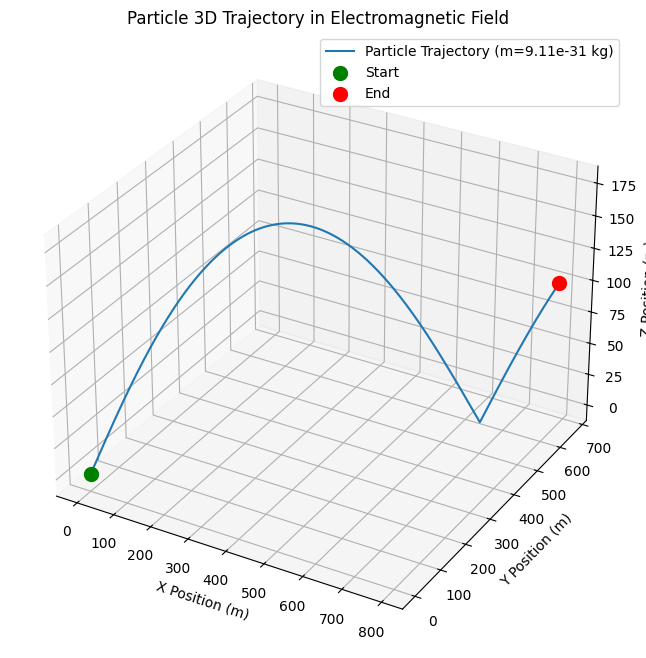

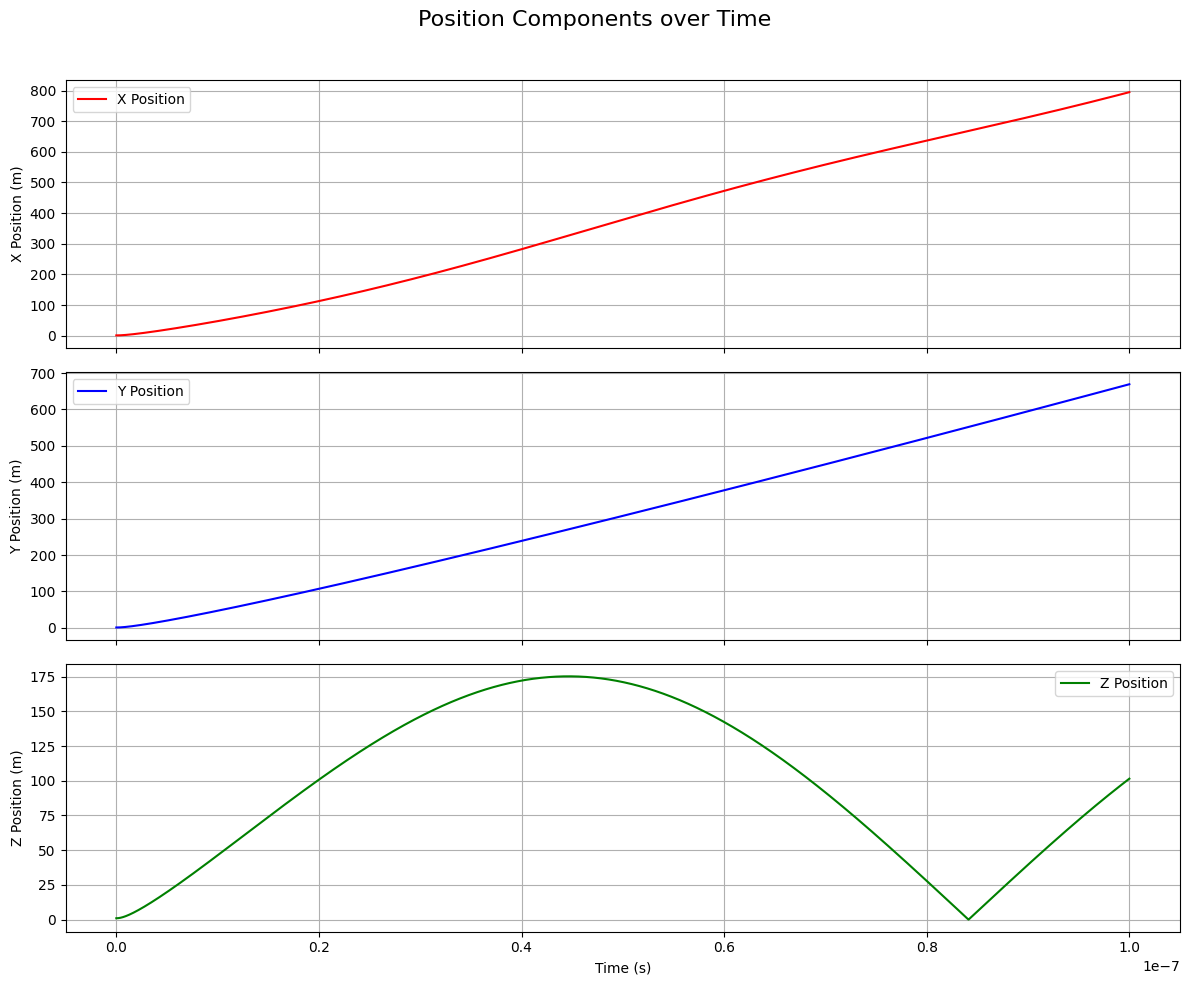

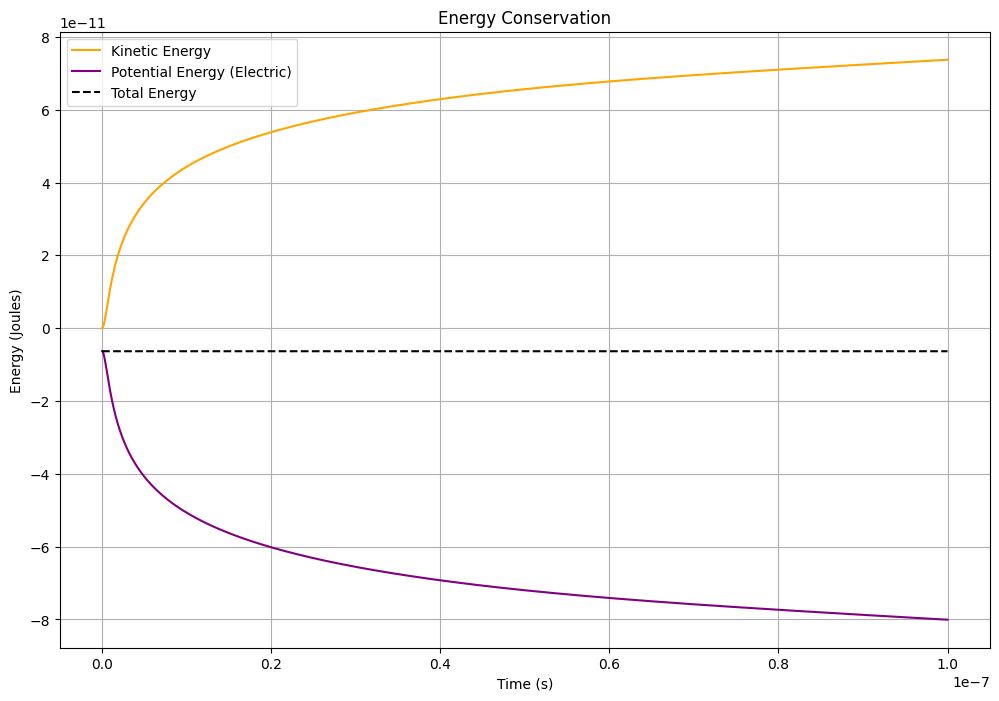

In [2]:
import numpy as np
import scipy
from scipy import constants
from sympy import symbols, log, sqrt
from sympy.vector import CoordSys3D, gradient, curl
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import for 3D plotting

# --- Global SymPy Coordinate System and Variables ---
# It's more efficient to define these once outside the functions
C = CoordSys3D('C')
x, y, z = C.x, C.y, C.z
v1, v2, v3 = symbols('v1 v2 v3')

def F_electrical(state_vector_numerical, q_numerical, q_lambda_numerical):
    """
    Calculates the electrical force on a particle.
    This function is defined once and then used in the simulation loop.
    """
    r_squared = x**2 + y**2 + z**2
    # Add a small epsilon to avoid log(0) or division by zero at the origin
    potential_sympy = (q_lambda_numerical / (2 * np.pi * constants.epsilon_0)) * log(sqrt(r_squared + 1e-12))

    # Calculate the gradient of the potential to get the E-field
    E_field_vector_sympy = -gradient(potential_sympy)

    # Lambdify the symbolic expression for the E-field into a fast numerical function
    E_field_numerical_func = lambdify((x, y, z), [E_field_vector_sympy.dot(C.i),
                                                  E_field_vector_sympy.dot(C.j),
                                                  E_field_vector_sympy.dot(C.k)], 'numpy')

    # Evaluate the E-field at the particle's current position
    E_field_numerical = E_field_numerical_func(state_vector_numerical[0],
                                               state_vector_numerical[1],
                                               state_vector_numerical[2])

    # Calculate the force F = qE
    F_el = q_numerical * np.array(E_field_numerical)
    return F_el


def F_Lorentz(state_vector_numerical, q_numerical, Gamma):
    """
    Calculates the Lorentz force on a particle.
    This function is defined once and then used in the simulation loop.
    """
    v_vector = v1*C.i + v2*C.j + v3*C.k
    # Note: The magnetic vector potential A is given by r_vector
    magnetic_potential_sympy = Gamma * ((z**2)*C.i + (-x/2 - 3/z)*C.j + -y*C.k)

    # B = curl(A)
    B_field_vector_sympy = curl(magnetic_potential_sympy)

    # F = q(v x B)
    F_Lorentz_sympy = q_numerical * v_vector.cross(B_field_vector_sympy)

    # Lambdify the symbolic expression for the Lorentz force
    F_Lorentz_numerical_func = lambdify((x, y, z, v1, v2, v3),
                                        [F_Lorentz_sympy.dot(C.i),
                                         F_Lorentz_sympy.dot(C.j),
                                         F_Lorentz_sympy.dot(C.k)], 'numpy')

    # Evaluate the force at the particle's current state
    F_Lorentz_numerical = F_Lorentz_numerical_func(state_vector_numerical[0],
                                                   state_vector_numerical[1],
                                                   state_vector_numerical[2],
                                                   state_vector_numerical[3],
                                                   state_vector_numerical[4],
                                                   state_vector_numerical[5])
    return np.array(F_Lorentz_numerical)


def particle_dynamics_electromagnetic(t, state_vector, q, m, q_lambda, Gamma):
    """
    The system of differential equations for the particle's motion.
    [dx/dt, dy/dt, dz/dt, dvx/dt, dvy/dt, dvz/dt]
    """
    F_el_numerical = F_electrical(state_vector, q, q_lambda)
    F_Lorentz_numerical = F_Lorentz(state_vector, q, Gamma)

    # Total force is the sum of electrical and Lorentz forces
    F_total = F_el_numerical + F_Lorentz_numerical

    drdt = np.zeros_like(state_vector)

    # Velocities
    drdt[0] = state_vector[3]
    drdt[1] = state_vector[4]
    drdt[2] = state_vector[5]

    # Accelerations (a = F/m)
    drdt[3] = F_total[0] / m
    drdt[4] = F_total[1] / m
    drdt[5] = F_total[2] / m

    return drdt


class particle:
    def __init__(self, initial_state, q, m, q_lambda, Gamma):
        self.initial_state = np.array(initial_state)
        self.m = m
        self.q = q
        self.q_lambda = q_lambda
        self.Gamma = Gamma
        self.time = None
        self.trajectory = None

    def solution_particle(self, time_range, time_range_array, rtol=1e-8, atol=1e-10):
        self.time = time_range_array
        # The 'args' tuple must match the order in particle_dynamics_electromagnetic
        # (q, m, q_lambda, Gamma)
        self.trajectory = scipy.integrate.solve_ivp(
            particle_dynamics_electromagnetic,
            time_range,
            self.initial_state,
            args=(self.q, self.m, self.q_lambda, self.Gamma), # Corrected argument order
            t_eval=time_range_array,
            method='DOP853',
            rtol=rtol,
            atol=atol
        )

    def plot_trajectory_3d(self):
        """
        Plots the particle's trajectory in a 3D space.
        """
        if self.trajectory is None:
            print("Please run solution_particle() first.")
            return

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        x_pos = self.trajectory.y[0, :]
        y_pos = self.trajectory.y[1, :]
        z_pos = self.trajectory.y[2, :]

        ax.plot(x_pos, y_pos, z_pos, label=f'Particle Trajectory (m={self.m:.2e} kg)')

        # Mark start and end points
        ax.scatter(x_pos[0], y_pos[0], z_pos[0], color='green', s=100, label='Start', depthshade=True)
        ax.scatter(x_pos[-1], y_pos[-1], z_pos[-1], color='red', s=100, label='End', depthshade=True)

        ax.set_xlabel('X Position (m)')
        ax.set_ylabel('Y Position (m)')
        ax.set_zlabel('Z Position (m)')
        ax.set_title('Particle 3D Trajectory in Electromagnetic Field')
        ax.legend()
        plt.grid(True)
        plt.show()

    def plot_position_components(self):
        """
        Plots the X, Y, and Z position components against time.
        """
        if self.trajectory is None:
            print("Please run solution_particle() first.")
            return

        fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
        fig.suptitle('Position Components over Time', fontsize=16)

        # X Position
        axs[0].plot(self.time, self.trajectory.y[0, :], color='red', label='X Position')
        axs[0].set_ylabel('X Position (m)')
        axs[0].grid(True)
        axs[0].legend()

        # Y Position
        axs[1].plot(self.time, self.trajectory.y[1, :], color='blue', label='Y Position')
        axs[1].set_ylabel('Y Position (m)')
        axs[1].grid(True)
        axs[1].legend()

        # Z Position
        axs[2].plot(self.time, self.trajectory.y[2, :], color='green', label='Z Position')
        axs[2].set_ylabel('Z Position (m)')
        axs[2].set_xlabel('Time (s)')
        axs[2].grid(True)
        axs[2].legend()

        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
        plt.show()

    def plot_energy(self):
        """
        Calculates and plots the kinetic, potential, and total energy over time.
        Note: The magnetic force does no work, so it does not contribute to potential energy.
        """
        if self.trajectory is None:
            print("Please run solution_particle() first.")
            return

        # Correctly calculate kinetic energy: 0.5 * m * (vx^2 + vy^2 + vz^2)
        vx, vy, vz = self.trajectory.y[3, :], self.trajectory.y[4, :], self.trajectory.y[5, :]
        energy_kinetic = 0.5 * self.m * (vx**2 + vy**2 + vz**2)

        # Potential energy U = qV, where V is the electric potential
        x_pos, y_pos, z_pos = self.trajectory.y[0, :], self.trajectory.y[1, :], self.trajectory.y[2, :]
        r_squared = x_pos**2 + y_pos**2 + z_pos**2
        energy_potential = (self.q * self.q_lambda / (2 * np.pi * constants.epsilon_0)) * np.log(np.sqrt(r_squared + 1e-12))
        total_energy = energy_kinetic + energy_potential

        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(self.time, energy_kinetic, color='orange', label='Kinetic Energy')
        ax.plot(self.time, energy_potential, color='purple', label='Potential Energy (Electric)')
        ax.plot(self.time, total_energy, color='black', linestyle='--', label='Total Energy')

        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (Joules)')
        ax.set_title('Energy Conservation')
        ax.grid(True)
        ax.legend()
        plt.show()


# --- Simulation Parameters ---
initial_state = [1.0, 1.0, 1.0, 20000, 1000, 15000] # [x, y, z, vx, vy, vz]
charge = -constants.elementary_charge # Electron charge is negative
mass = constants.electron_mass
q_lambda = 0.004 # Linear charge density
Gamma = 5e-7 # Magnetic field strength parameter

# --- Time settings ---
t_end = 1e-7 # A shorter time is better for this high-velocity particle
time_vector = [0, t_end]
time_vector_array = np.linspace(0, t_end, 5000)

# --- Run Simulation ---
electron1 = particle(initial_state, charge, mass, q_lambda, Gamma)
electron1.solution_particle(time_vector, time_vector_array)

# --- Plot Results ---
electron1.plot_trajectory_3d()
electron1.plot_position_components()
electron1.plot_energy()




##**Data Analysis Intro**##

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target_names[iris.target], name='species')

df = pd.concat([X, y], axis=1)

df_dropped_species = df.drop('species', axis=1)

sepal_width_mask = df['sepal width (cm)'] > 4
df_sepal_width_filtered = df[sepal_width_mask]

petal_length_mask = df['petal length (cm)'] < 1.5
petal_width_mask = df['petal width (cm)'] < 0.2
df_petal_length_petal_width_filtered = df[petal_length_mask & petal_width_mask]





None
